# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [1]:
import pandas, seaborn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['font.size'] = 20

In [3]:
df = pandas.read_csv("data/raw/Anime/anime_data.csv")
df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


In [4]:
df = df.drop(["synopsis", "title", "title_english"], axis=1) # у каждого уникальные

df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]",TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]",TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",Movie


In [5]:
df.isna().sum()

mal_id           0
aired_from       5
aired_to      5368
duration         0
episodes         0
genres           0
popularity       0
premiered     7880
rank          1282
rating           0
score            0
scored_by        0
source           0
status           0
studios          0
type             0
dtype: int64

In [6]:
df["aired_to"].fillna("unknown", inplace=True)
df.dropna(subset=["aired_from"], inplace=True)
# df["aired_from"].fillna("!!",inplace=True)
df["premiered"].fillna("unknown", inplace=True)


In [7]:

df["month"] = df.apply(lambda x: int(str(x["aired_from"])[5:7]), axis=1)
df["year"] = df.apply(lambda x: int(str(x["aired_from"])[0:4]), axis=1)
df["scored_per_episode"] = df.apply(lambda x: int(x["scored_by"] / x["episodes"]), axis=1)

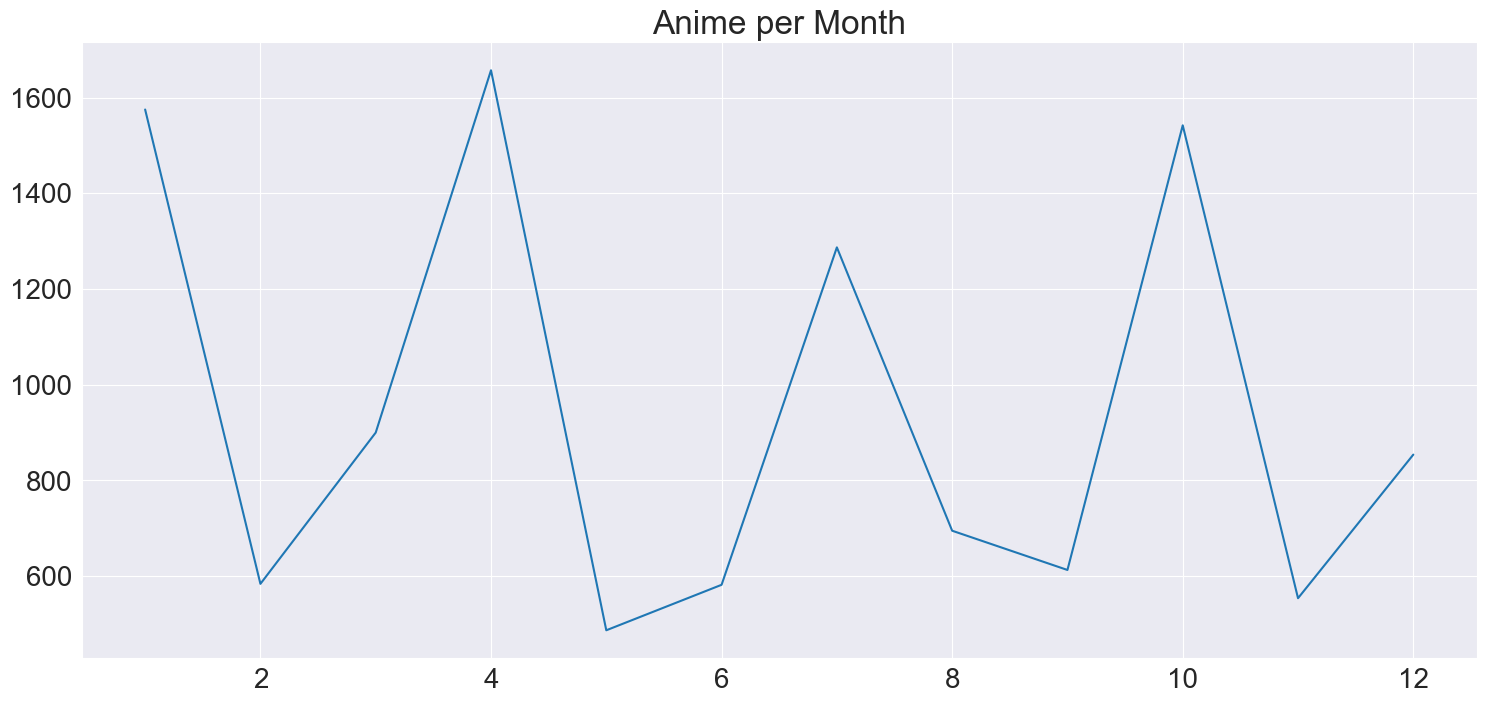

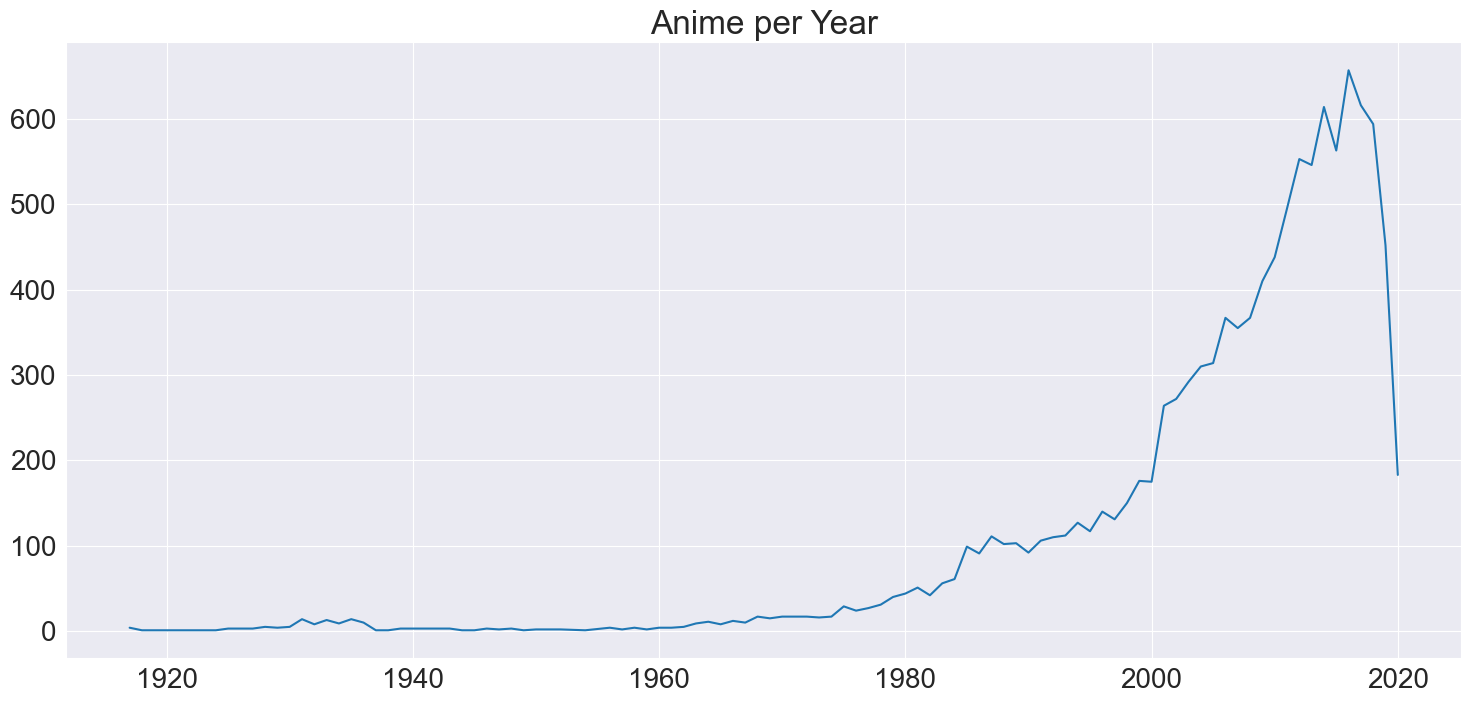

In [22]:
df["month"].value_counts().sort_index().plot(title="Anime per Month")
plt.show()


df["year"].value_counts().sort_index().plot(title="Anime per Year")
plt.show()

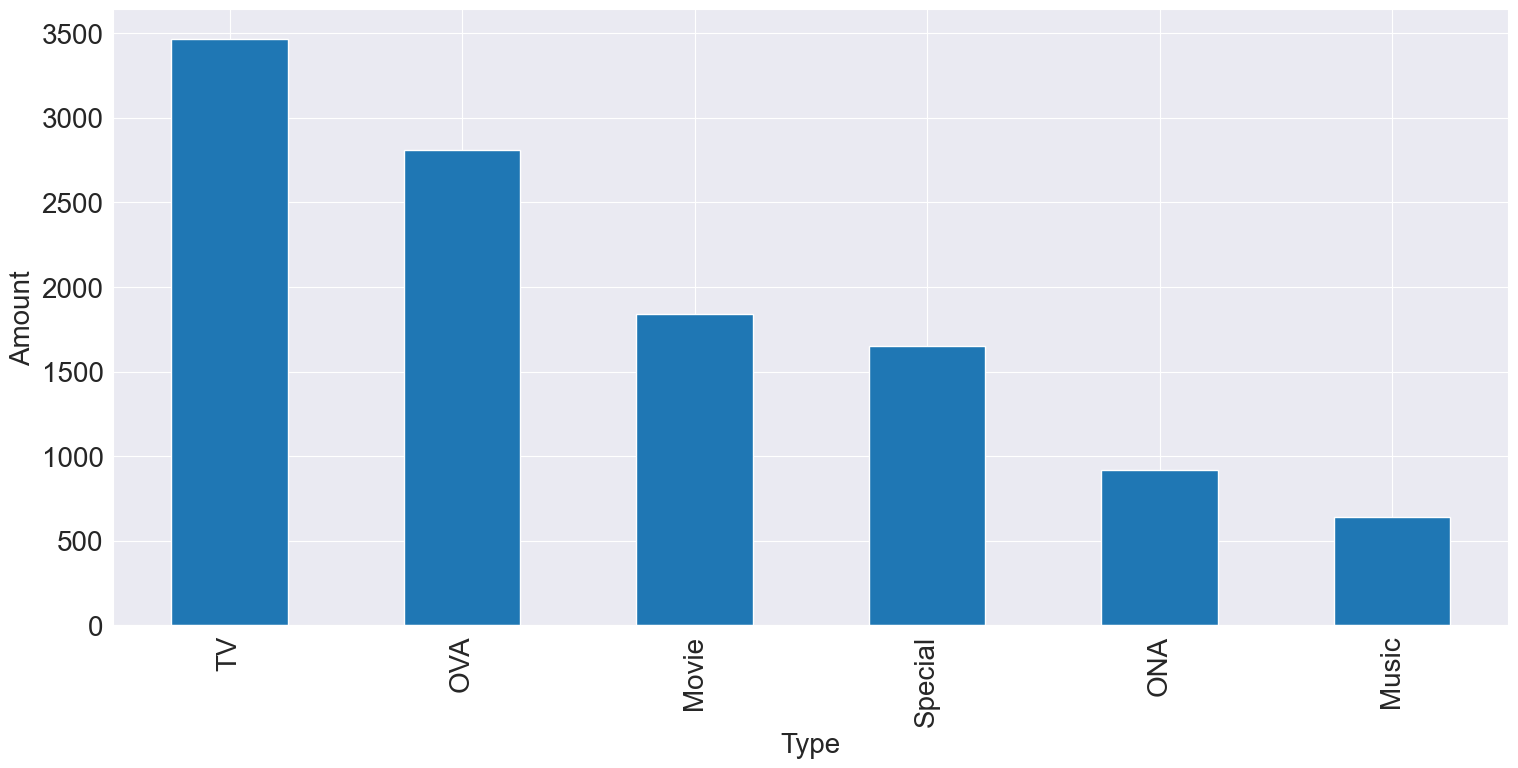

In [9]:
df["type"].value_counts().plot(kind="bar", xlabel="Type", ylabel="Amount")
plt.show()

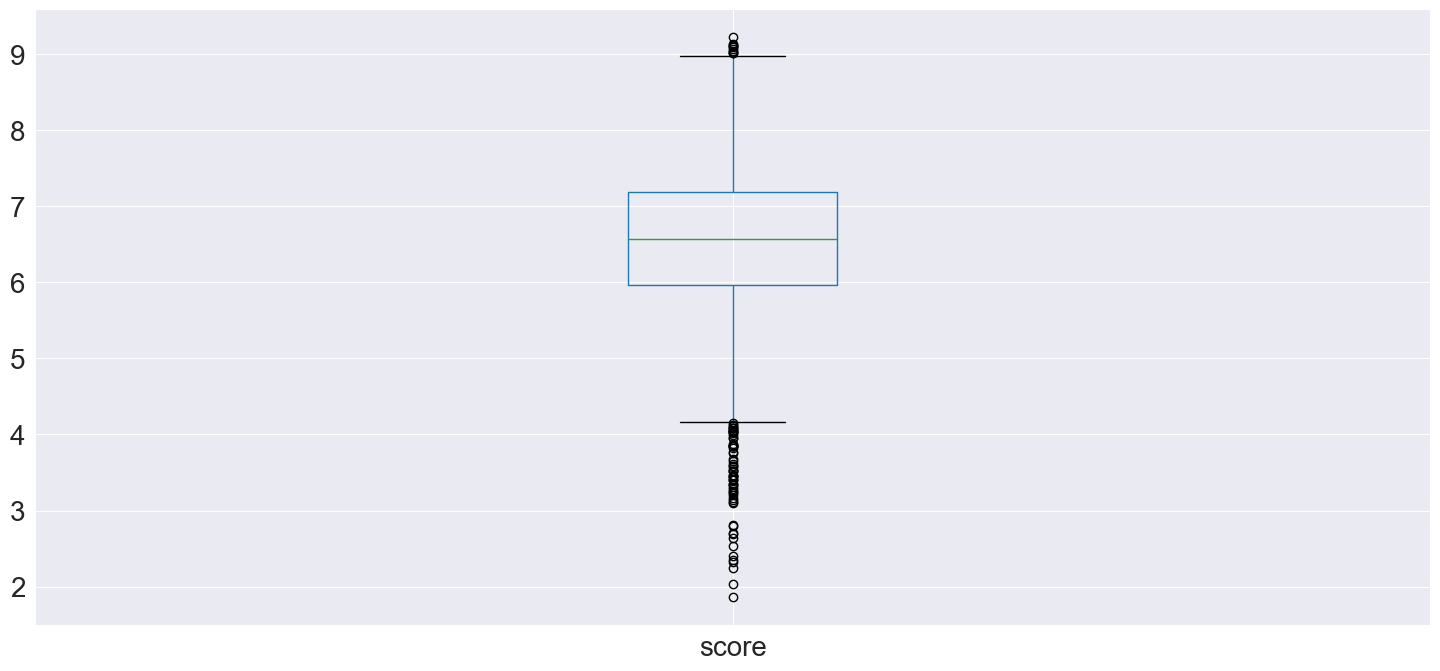

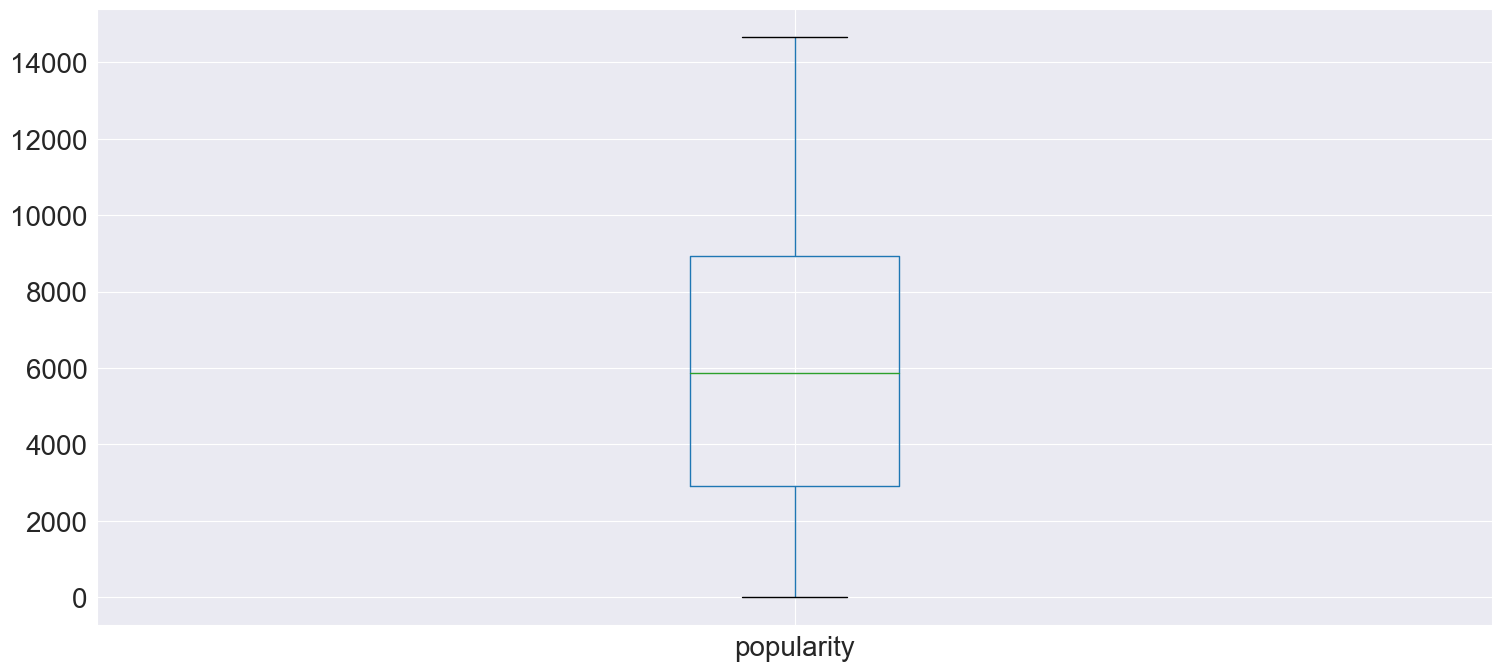

In [10]:
df.boxplot(["score"])
plt.show()
df.boxplot(["popularity"])
plt.show()

<AxesSubplot: xlabel='type', ylabel='popularity'>

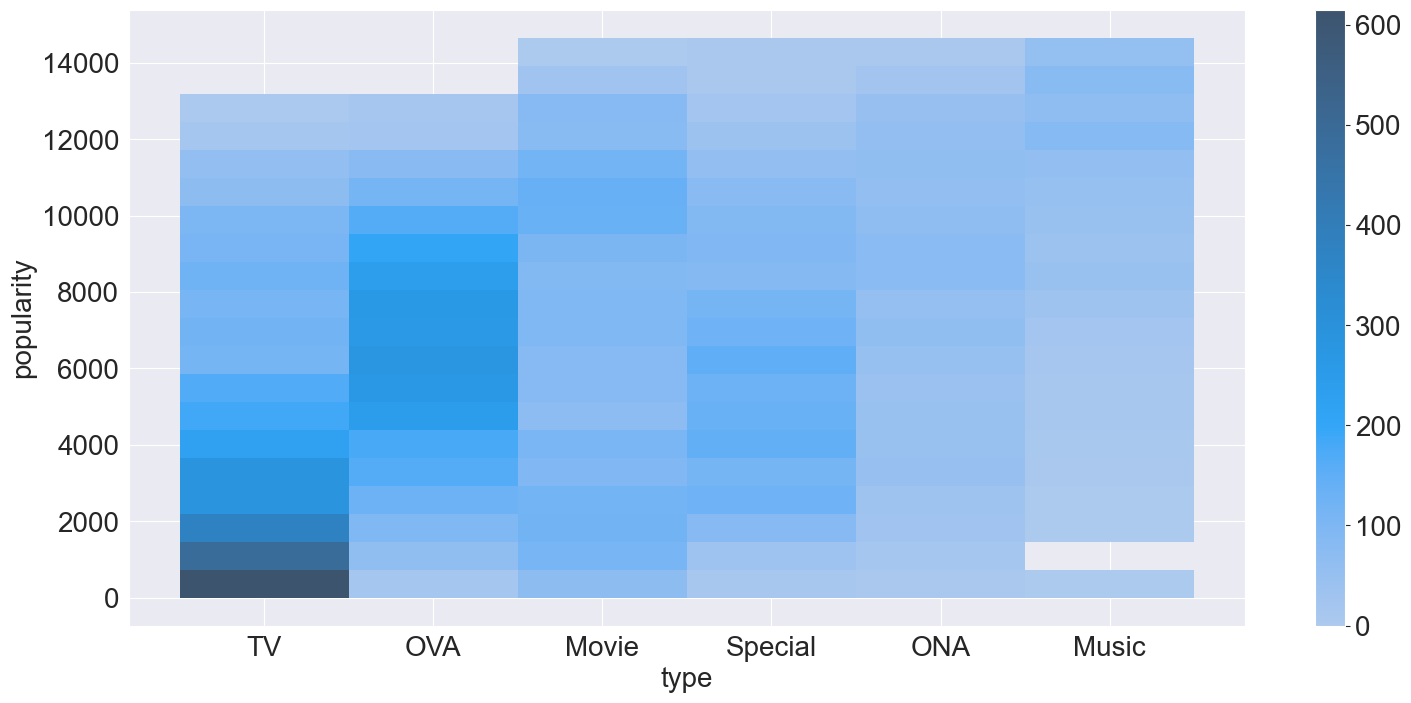

In [11]:
seaborn.histplot(data=df, x="type", y="popularity", bins=20, cbar=True)

<AxesSubplot: xlabel='scored_per_episode', ylabel='score'>

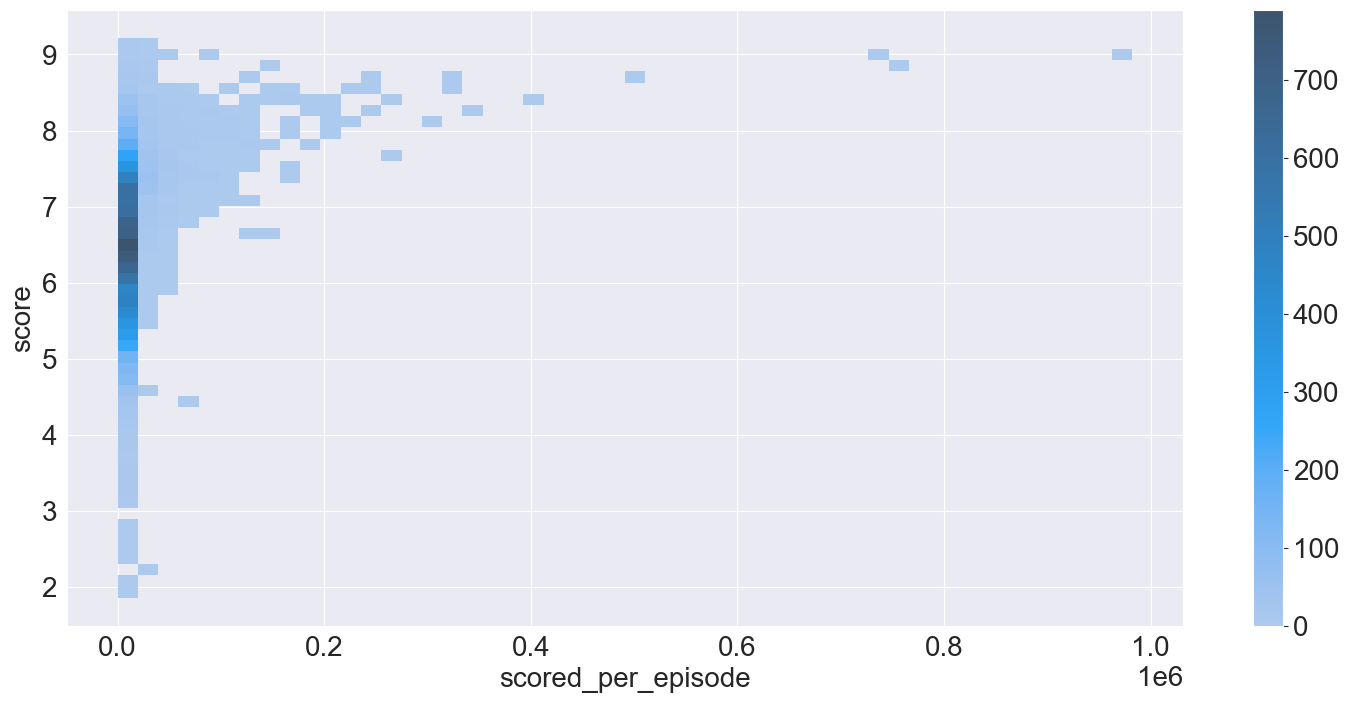

In [12]:
seaborn.histplot(data=df, x="scored_per_episode", y="score", bins=50, cbar=True)

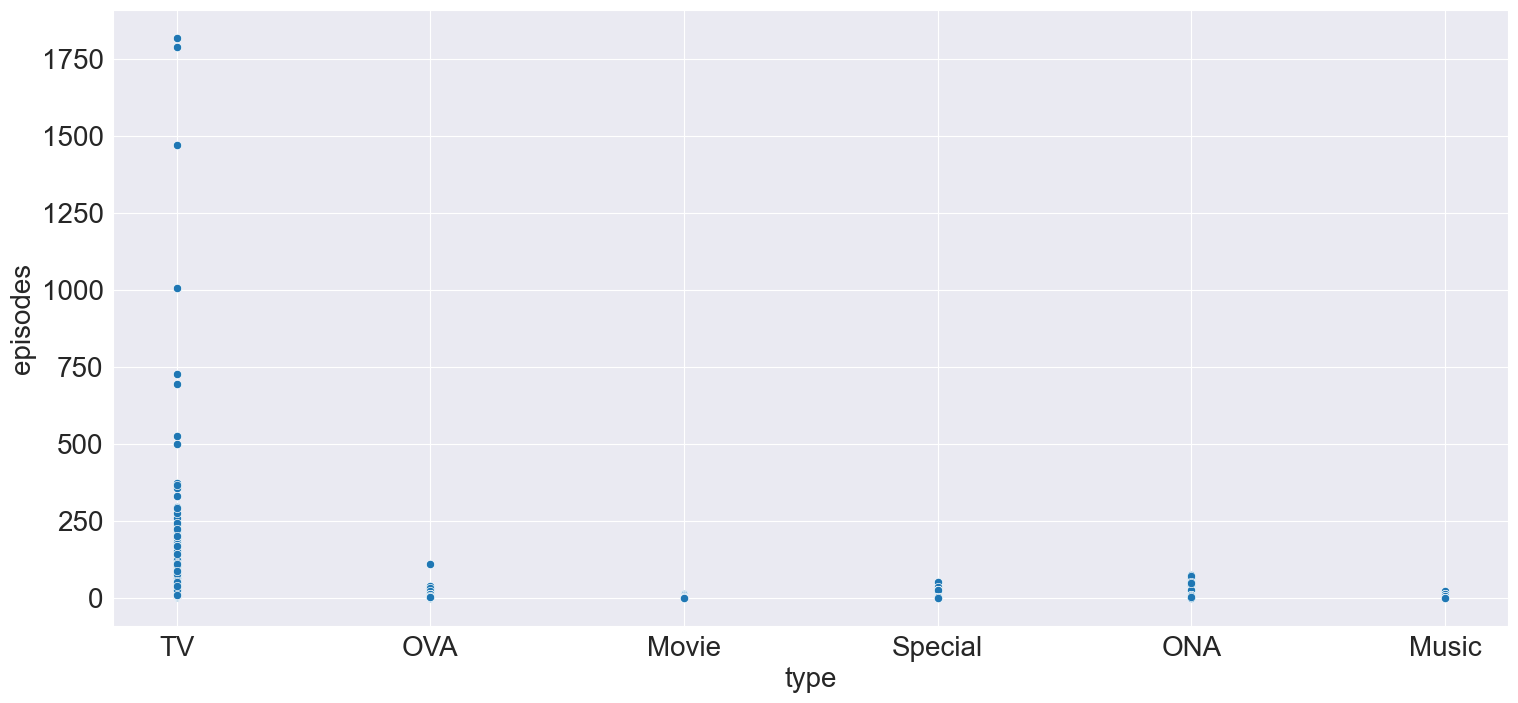

In [13]:
seaborn.scatterplot(data=df, x="type", y="episodes")
plt.show()

In [14]:
df.to_csv("data/processed/Anime/anime_data.csv", index=False)

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

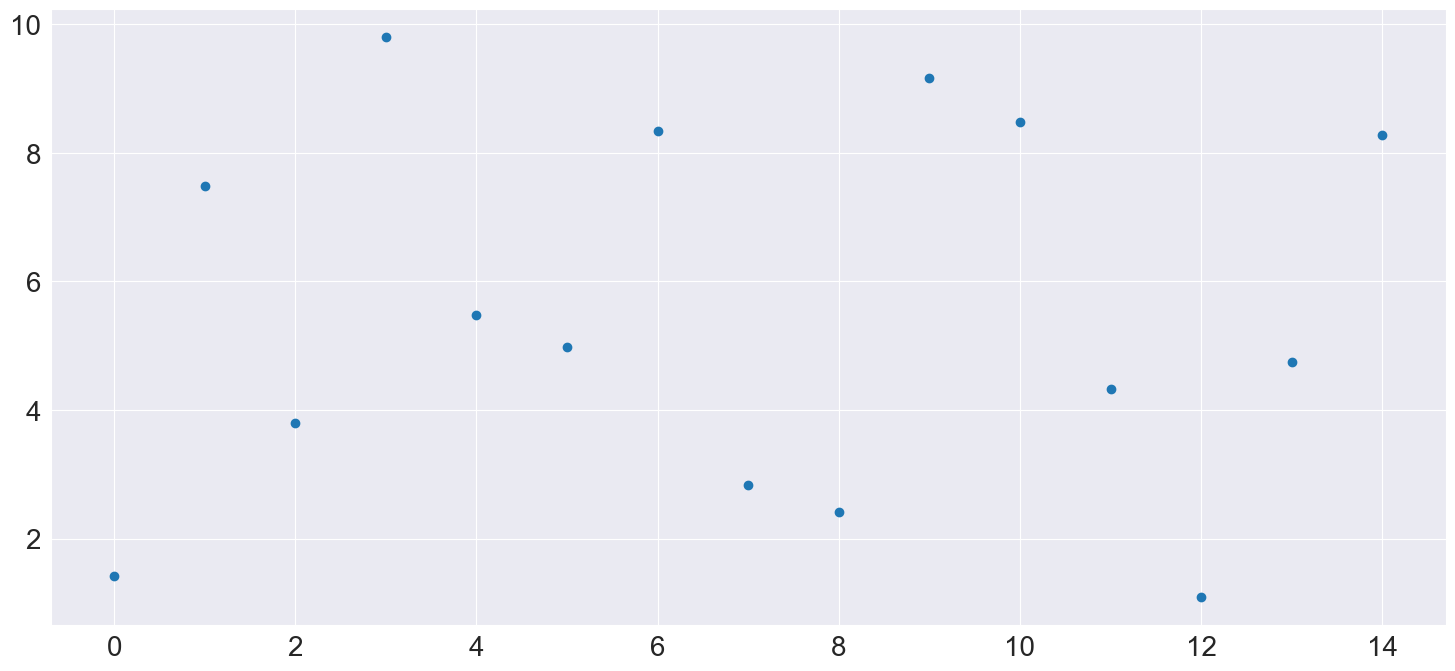

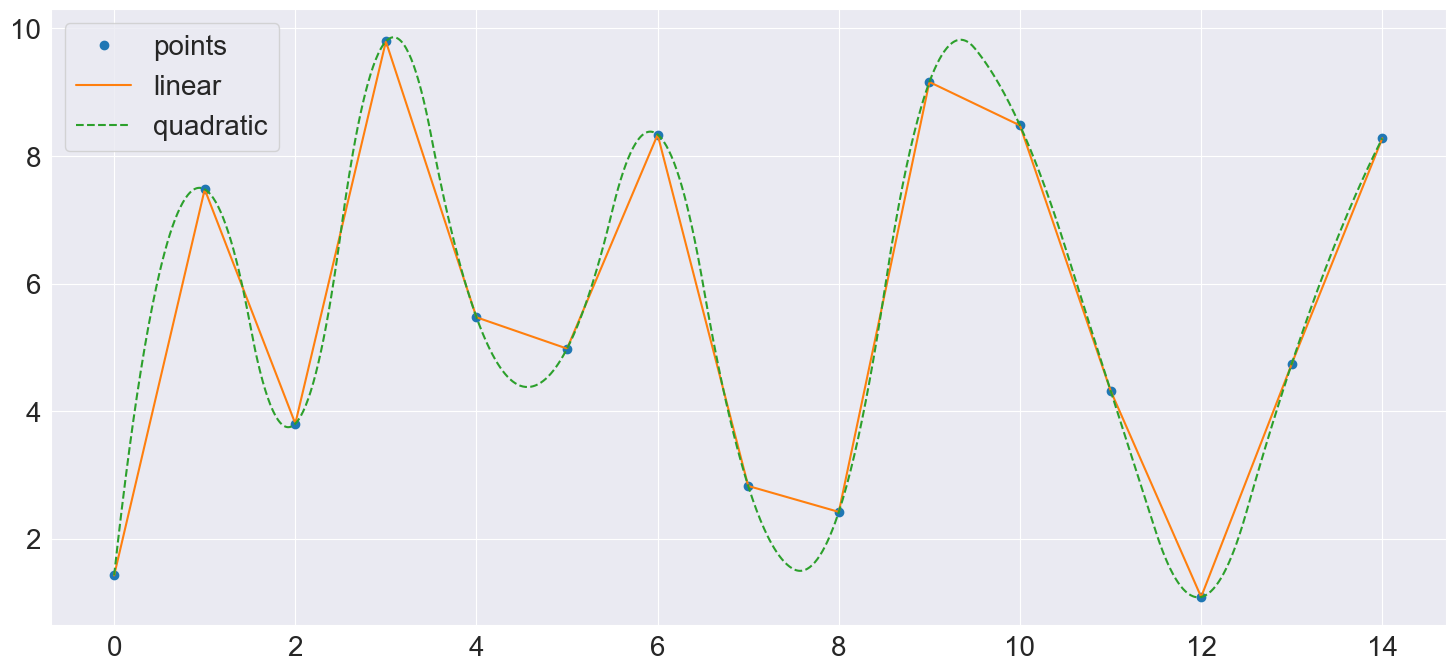

In [15]:
import scipy
from numpy.polynomial.polynomial import Polynomial

np.random.seed(1357)
n = 15
alpha = 10

points_x = np.arange(n)
points_y = np.random.random(n) * alpha
plt.scatter(points_x, points_y)
plt.show()
pol = scipy.interpolate.lagrange(points_x, points_y)
x = np.linspace(0, 14, 1000)

pol1 = scipy.interpolate.interp1d(points_x, points_y, kind="linear") # a + bx
pol2 = scipy.interpolate.interp1d(points_x, points_y, kind="quadratic") # a + bx + cx^2
plt.plot(points_x, points_y, "o",
    x, pol1(x), "-",
    x, pol2(x), "--")
plt.legend(["points", "linear", "quadratic"])
plt.show()

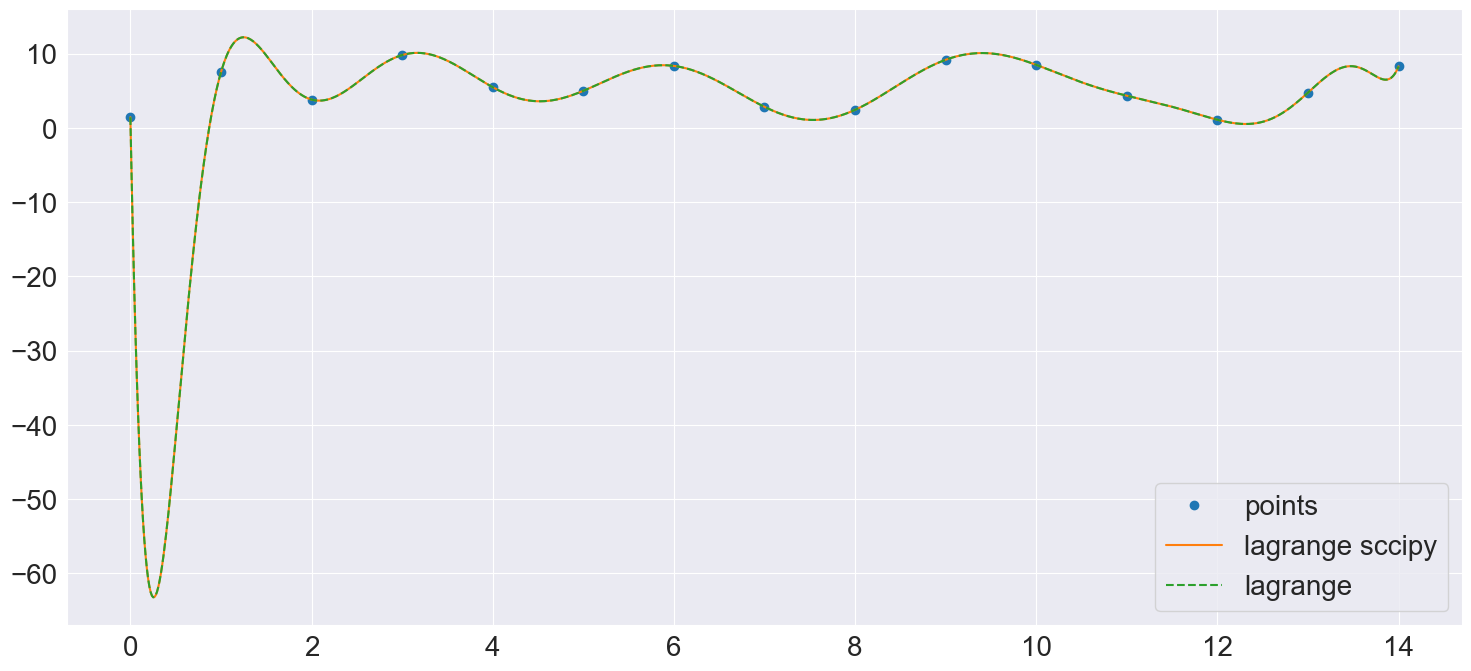

In [16]:
def lagrange(x, y, points): # sum(yi * prod((x-x_j) / (x_i - x_j)))
    if len(x) != len(y):
        raise ValueError("len(x) != len(y)")
    res = np.zeros(len(points))
    for t in range(len(points)):
        px = points[t]
        py = 0
        for i in range(len(x)):
            p = 1
            for j in range(len(x)):
                if i != j:
                    p *= (px - x[j])/(x[i] - x[j])
            py += p * y[i]
        res[t] = py
    return res

res = lagrange(points_x, points_y, x)


plt.plot(points_x, points_y, "o",
    x, Polynomial(pol.coef[::-1])(x), "-",
    x, res, "--")
plt.legend(["points", "lagrange sccipy", "lagrange"])
plt.show()

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

In [17]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

# array = [1,1,2,3,4,1,2,3,4]
#
# value_counts, bins_names, visual_figure = plt.hist(array,
#                                                    bins=len(set(array)),
#                                                    rwidth=0.9)
# # Параметр rwidth и визуализацию в своей функции реализовывать не требуется
# print('Значения колонок:', value_counts)
# print('Названия колонок:', bins_names)

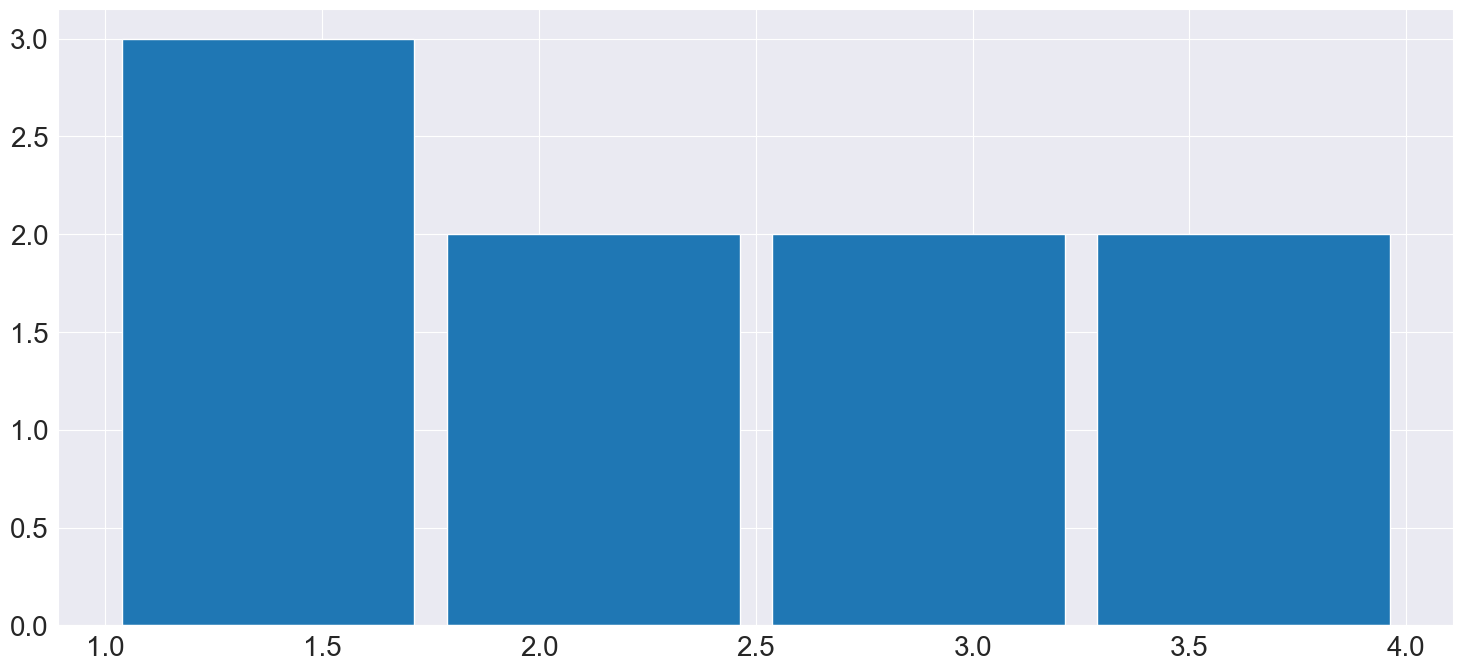

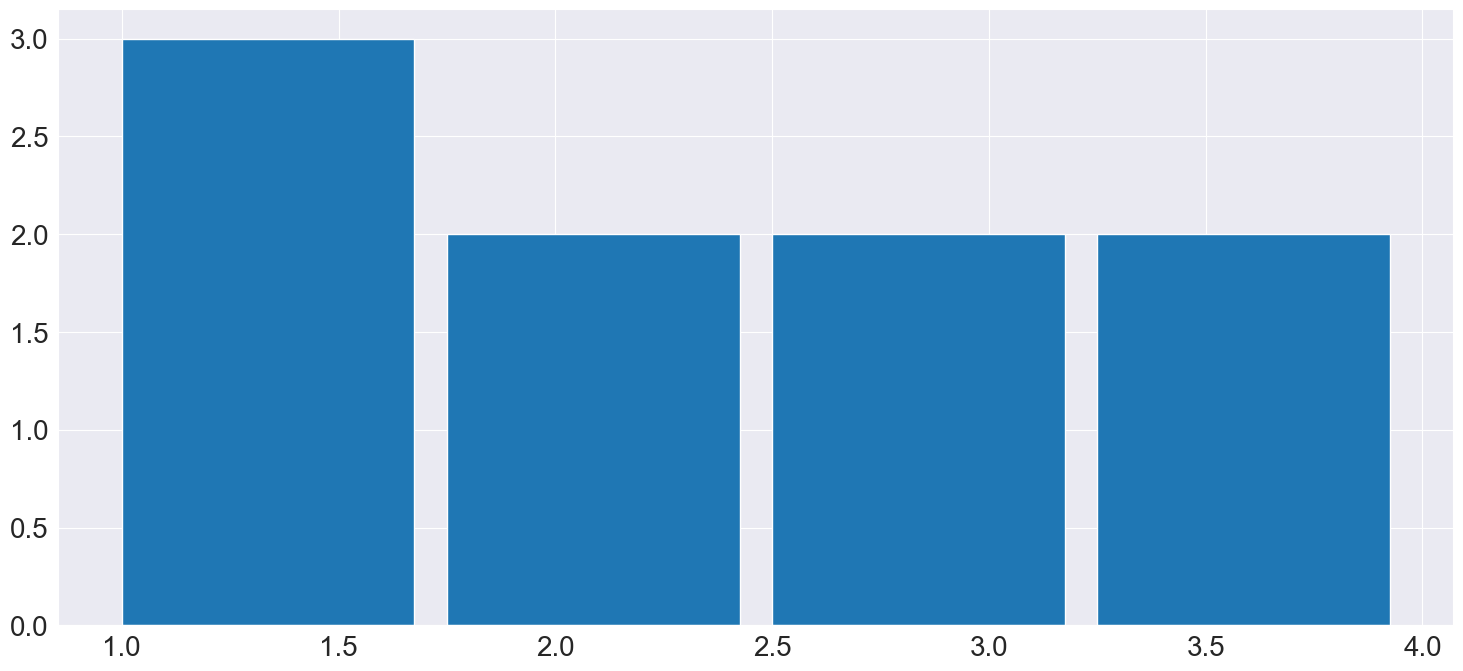

In [18]:
from typing import List, Tuple, Union
from collections import Counter

def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_elem = min(array)
    step = (max(array) - min_elem) / bins
    max_bin = min_elem + step * bins + step * 0.9
    bins_array = Counter({k: 0 for k in range(bins)})
    c = Counter(map(lambda x: min(int((x - min_elem) / step), bins - 1), array))
    bins_array.update(c)

    values = [item[1] for item in sorted(bins_array.items(), key=lambda x: x[0])]

    return values, list(np.arange(min_elem, max_bin, step))


def fast_hist_with_bar(in_data, bins=1):
    if bins <= 1:
        bins = len(in_data) // 5
    val, binds = fast_hist(in_data, bins)
    plt.bar(binds[:(len(binds) - 1)], val, align="edge", width=(binds[1] - binds[0]) * 0.9)



array = [1,1,2,3,4,1,2,3,4]
value_counts, bins_names, _ = plt.hist(array, bins=len(set(array)), rwidth=0.9)
plt.show()

fast_hist_with_bar(array, len(set(array)))
plt.show()


Случайные данные

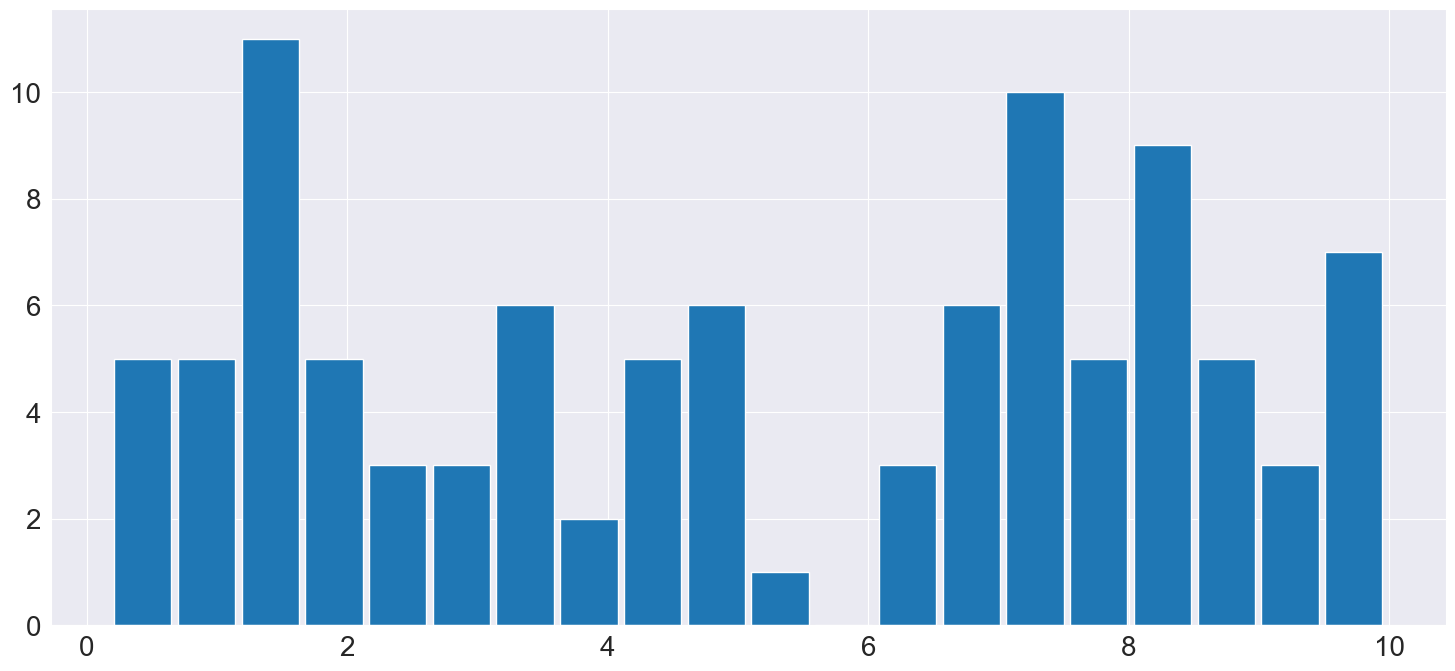

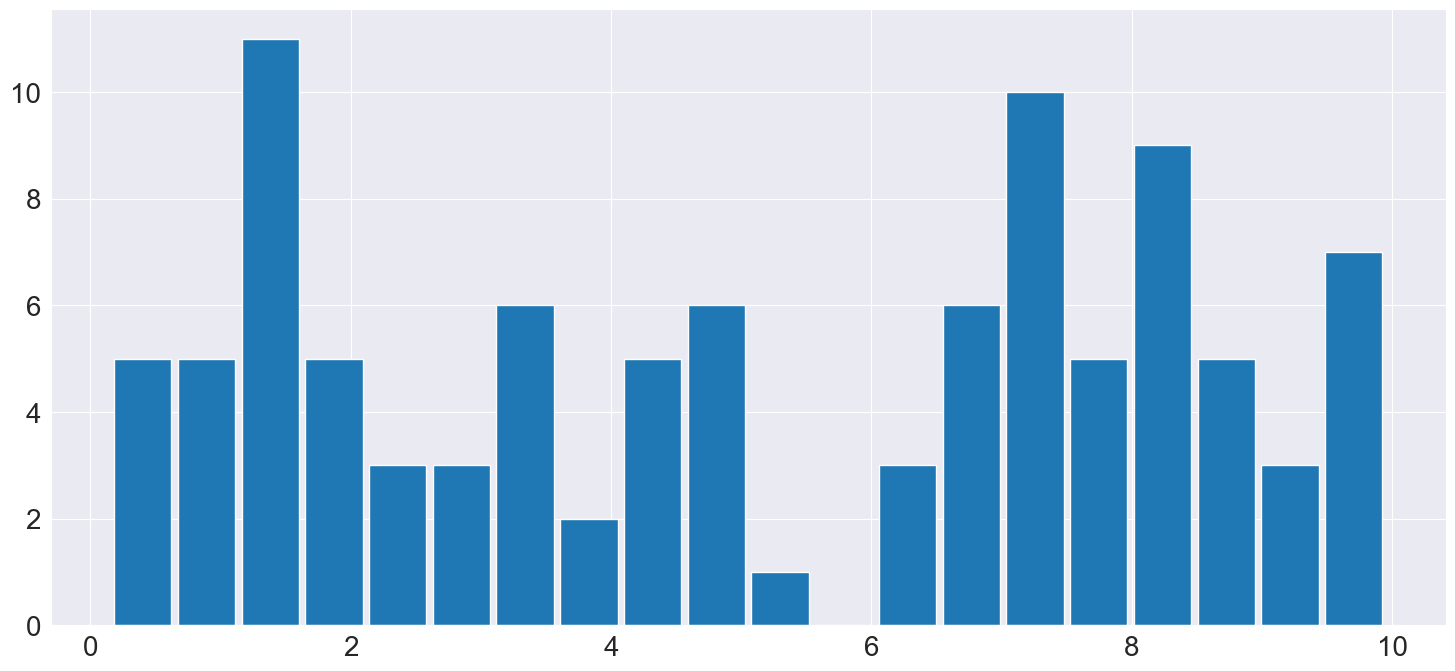

In [19]:
np.random.seed(134)
in_data = np.random.random(100) * 10
plt.hist(in_data, bins=len(in_data) // 5, rwidth=0.9)
plt.show()


fast_hist_with_bar(in_data)
plt.show()

Тесты

hist test
6.91 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


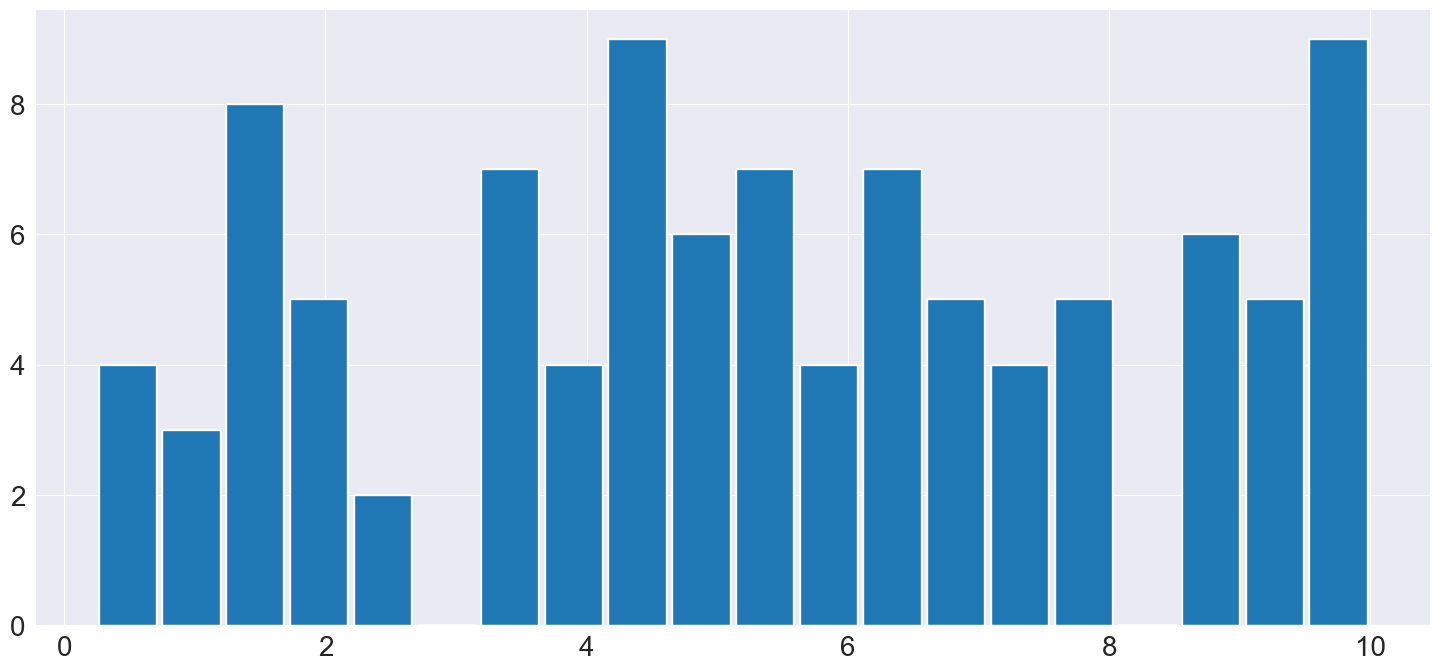

fast hist test
48.3 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
fast hist test with show
6.73 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


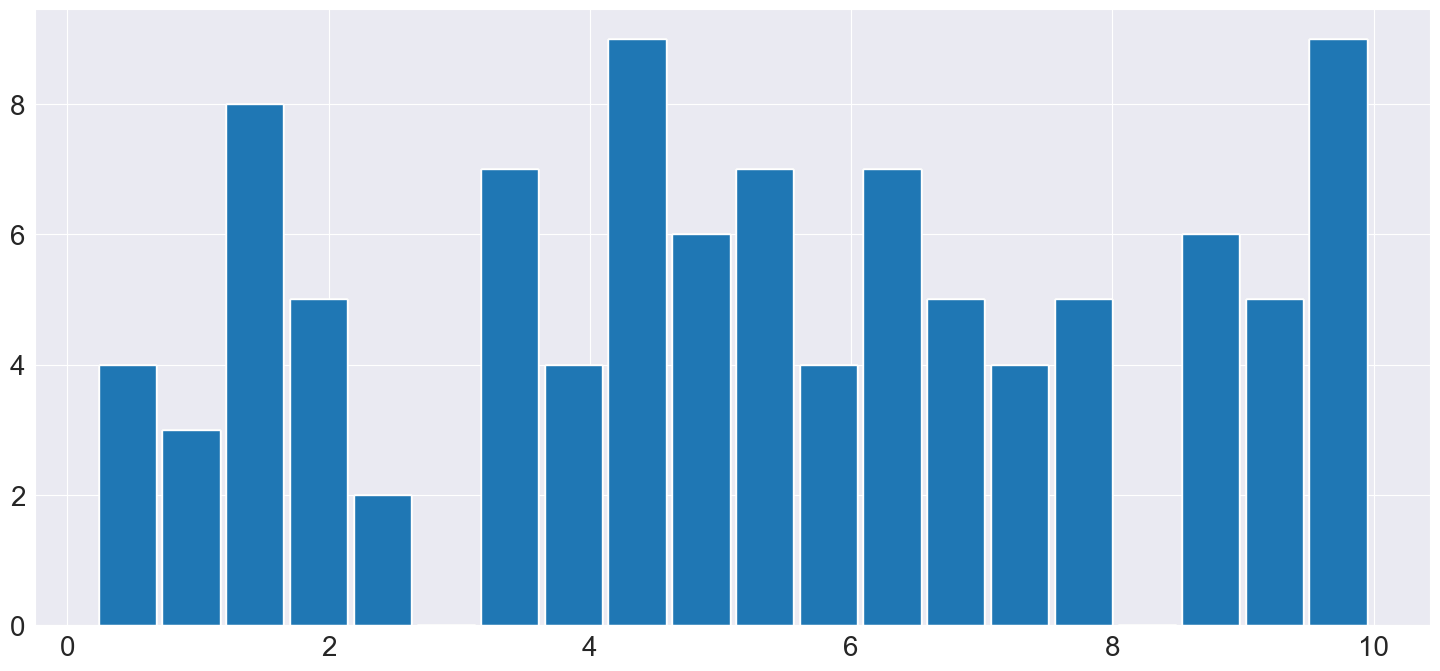

In [20]:

in_data = np.random.random(100) * 10
print("hist test")
%timeit value_counts, bins_names, _ = plt.hist(in_data, bins=len(in_data) // 5, rwidth=0.9)
plt.show()

print("fast hist test")
%timeit val, binds = fast_hist(in_data, len(in_data) // 5)

print("fast hist test with show")
%timeit fast_hist_with_bar(in_data)
plt.show()